In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("./predict-energy-behavior-of-prosumers/train.csv")

In [3]:
train_data.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [4]:
# check train data size
train_data.shape

(2018352, 9)

In [5]:
train_data.dtypes

county                  int64
is_business             int64
product_type            int64
target                float64
is_consumption          int64
datetime               object
data_block_id           int64
row_id                  int64
prediction_unit_id      int64
dtype: object

In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
county,2018352.0,7.297034e+00,4.780990,0.0,3.000,7.000,1.100000e+01,15.000
is_business,2018352.0,5.368261e-01,0.498642,0.0,0.000,1.000,1.000000e+00,1.000
product_type,2018352.0,1.898927e+00,1.081766,0.0,1.000,2.000,3.000000e+00,3.000
target,2017824.0,2.748556e+02,909.502378,0.0,0.378,31.133,1.802062e+02,15480.274
is_consumption,2018352.0,5.000000e-01,0.500000,0.0,0.000,0.500,1.000000e+00,1.000
data_block_id,2018352.0,3.218746e+02,182.634314,0.0,166.000,323.000,4.790000e+02,637.000
row_id,2018352.0,1.009176e+06,582648.179597,0.0,504587.750,1009175.500,1.513763e+06,2018351.000
prediction_unit_id,2018352.0,3.304538e+01,19.590594,0.0,16.000,33.000,5.000000e+01,68.000


In [7]:
# check for missing values
train_data.isna().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [8]:
# check for missing datetime
datetimes = pd.to_datetime(train_data["datetime"], format='%Y-%m-%d %H:%M:%S').array.unique()
datetime_fullrange = pd.date_range(start=min(datetimes), end=max(datetimes), freq='1h')
print("Start date/time: ", min(datetimes))
print("End date/time: ", max(datetimes))
print(f"Missing datetimes: {len(datetime_fullrange.difference(datetimes.unique()))}")

Start date/time:  2021-09-01 00:00:00
End date/time:  2023-05-31 23:00:00
Missing datetimes: 0


In [9]:
# Drop missing target samples
train_data.dropna(inplace=True)
train_data.shape

(2017824, 9)

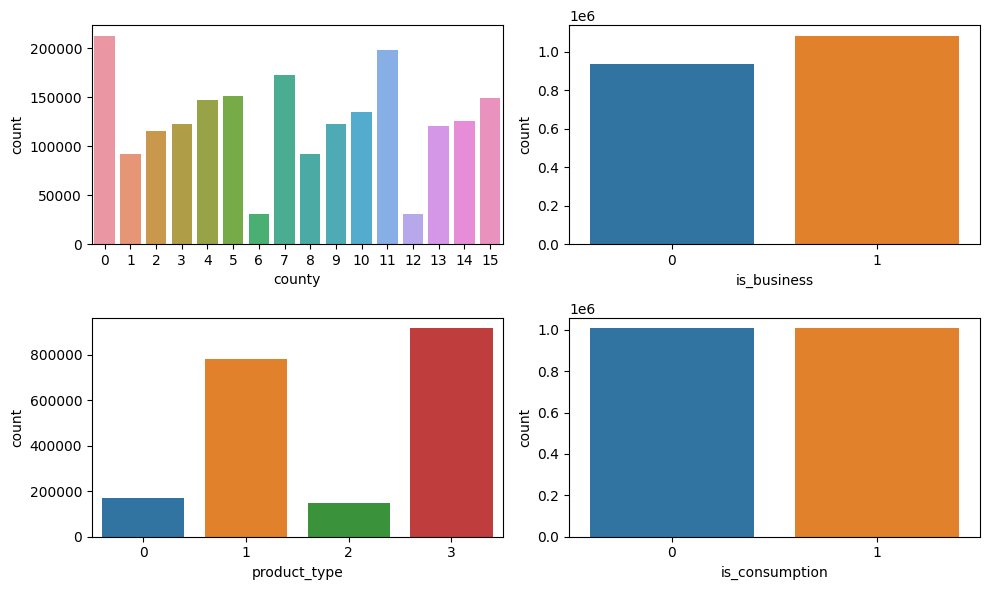

In [10]:
# There are 4 features representing catgories: county, is_business, product_type, is_consumption
# check the count for each category in this features
categorical_features = ["county", "is_business", "product_type", "is_consumption"]

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()

for index, col in enumerate(categorical_features):
    _ = sns.countplot(data=train_data, x=col, ax=axs[index])

_ = fig.tight_layout()

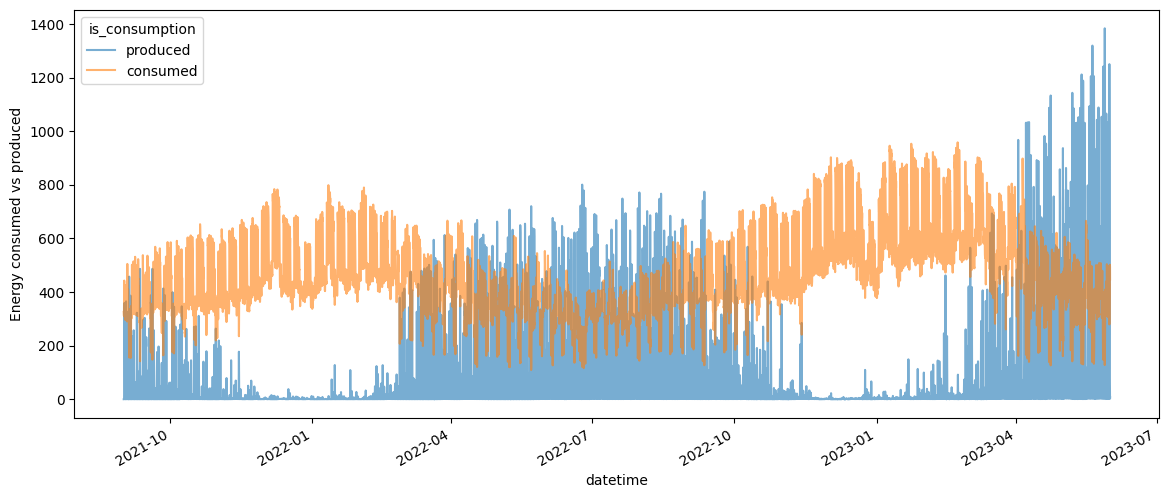

In [11]:
# target column represent the amount of energy consumed vs produced for each segment/hour
# let's see how energy amounts evolve on average
train_data["datetime"] = pd.to_datetime(train_data["datetime"], format='%Y-%m-%d %H:%M:%S')
avg_target = train_data.groupby(['datetime','is_consumption'])['target'].mean() \
                       .unstack().rename({0: 'produced', 1:'consumed'}, axis=1)

avg_target.plot(figsize=(14, 6), alpha=0.6)
_ = plt.ylabel('Energy consumed vs produced')

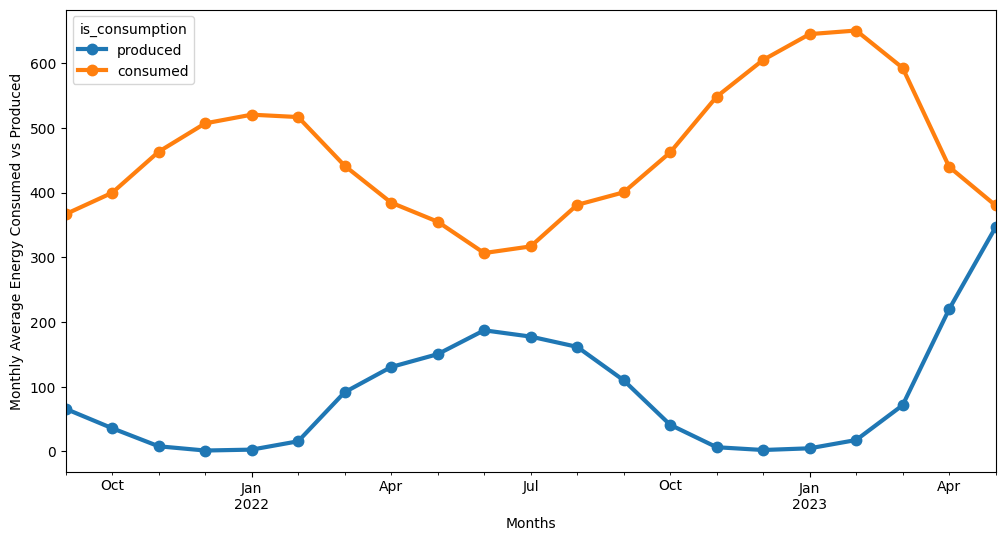

In [12]:
# plot of monthly average energy
avg_target.resample('M').mean().plot(figsize=(12,6), linewidth=3, marker=".", markersize=15)
plt.xlabel("Months")
_ = plt.ylabel('Monthly Average Energy Consumed vs Produced')

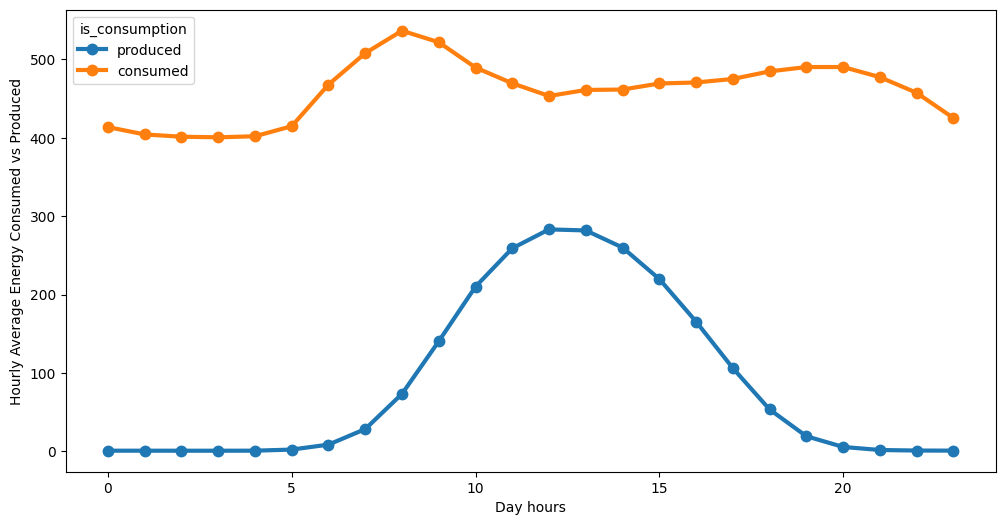

In [13]:
avg_target.groupby(avg_target.index.hour).mean().plot(figsize=(12, 6), linewidth=3, marker=".", markersize=15)
plt.xlabel("Day hours")
_ = plt.ylabel("Hourly Average Energy Consumed vs Produced")

In [14]:
# Extract date/time features from datetime column
train_data['hour'] = train_data.datetime.dt.hour
train_data['dayofweek'] = train_data.datetime.dt.dayofweek
train_data['week'] = train_data.datetime.dt.isocalendar().week.astype("int")
train_data['dayofyear'] = train_data.datetime.dt.dayofyear
train_data['month'] = train_data.datetime.dt.month
train_data['year'] = train_data.datetime.dt.year

In [15]:
train_data.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,hour,dayofweek,week,dayofyear,month,year
0,0,0,1,0.713,0,2021-09-01,0,0,0,0,2,35,244,9,2021
1,0,0,1,96.590,1,2021-09-01,0,1,0,0,2,35,244,9,2021
2,0,0,2,0.000,0,2021-09-01,0,2,1,0,2,35,244,9,2021
3,0,0,2,17.314,1,2021-09-01,0,3,1,0,2,35,244,9,2021
4,0,0,3,2.904,0,2021-09-01,0,4,2,0,2,35,244,9,2021


In [16]:
# explore electricity prices data
prices_data = pd.read_csv("./predict-energy-behavior-of-prosumers/electricity_prices.csv")

In [17]:
prices_data.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [18]:
prices_data.dtypes

forecast_date     object
euros_per_mwh    float64
origin_date       object
data_block_id      int64
dtype: object

In [19]:
prices_data.isna().sum()

forecast_date    0
euros_per_mwh    0
origin_date      0
data_block_id    0
dtype: int64

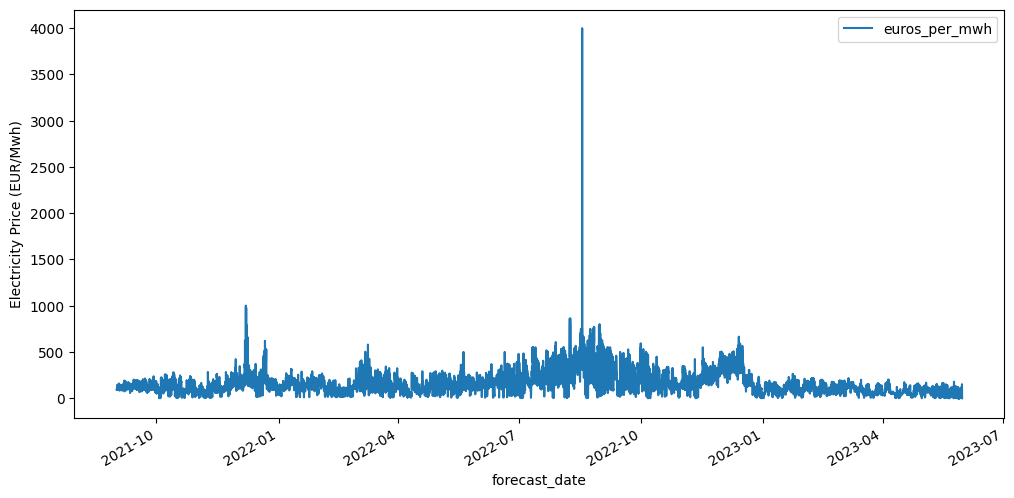

In [20]:
prices_data["forecast_date"] = pd.to_datetime(prices_data["forecast_date"], format='%Y-%m-%d %H:%M:%S')
prices_data.plot(y="euros_per_mwh", x="forecast_date", figsize=(12,6))
_ = plt.ylabel("Electricity Price (EUR/Mwh)")

<ipython-input-21-ad3519698fcb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices_data.resample('D', on="forecast_date").mean()["euros_per_mwh"].plot(figsize=(12,6))


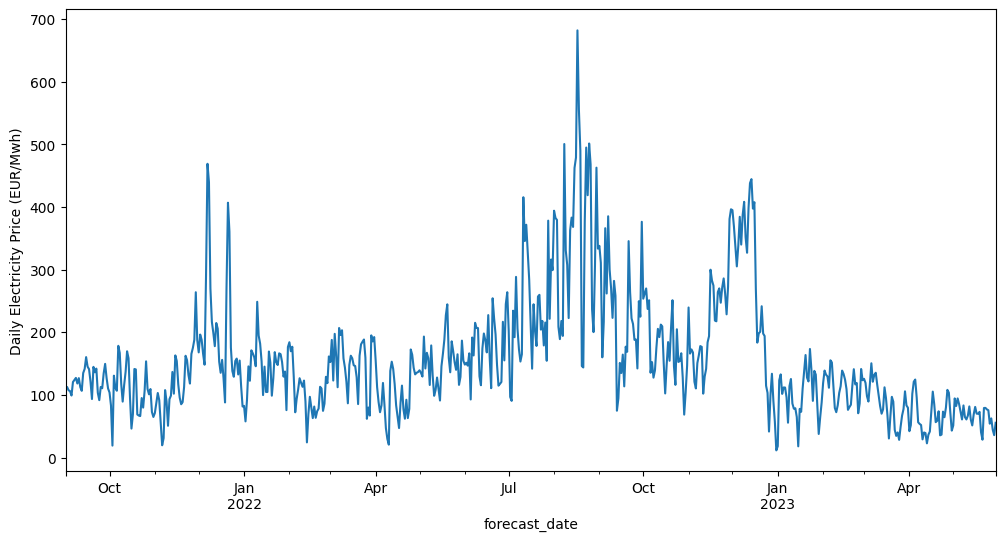

In [21]:
# average price per day
prices_data.resample('D', on="forecast_date").mean()["euros_per_mwh"].plot(figsize=(12,6))
_ = plt.ylabel("Daily Electricity Price (EUR/Mwh)")